In [9]:
include(joinpath("..","src","setup.jl"))
datadir = joinpath("..","data","count_lengths","run_2018-11-26")
params = load_params(joinpath(datadir,"params.jld2"))
params[:pindex] = 1:size(params,1)

┌ Warning: Package RCall does not have AxisArrays in its dependencies:
│ - If you have RCall checked out for development and have
│   added AxisArrays as a dependency but haven't updated your primary
│   environment's manifest file, try `Pkg.resolve()`.
│ - Otherwise you may need to report an issue with RCall
│ Loading AxisArrays into RCall from project dependency, future warnings for RCall are suppressed.
└ @ nothing nothing:840


┌ Info: Loading Cairo backend into Compose.jl
└ @ Compose /Users/davidlittle/.julia/packages/Compose/wlPCt/src/Compose.jl:164
┌ Info: Loading DataFrames support into Gadfly.jl
└ @ Gadfly /Users/davidlittle/.julia/packages/Gadfly/ew1SM/src/mapping.jl:228


1:900

In [124]:
using JLD2
# NOTE becuase we select a very specific example, we can't perfectly reproduce on each run;
# normally just use the exact some run to make the plots. If necessary we can recreate 
# the plot with a new run, but it will require rerunning the model and then picking an appropriate time
# slice that demonstrates an easy to interpret result.
if !isfile("output_run.jld2")
    p = copy(params[select_params(params,t_c_a=5,t_c_m=5,Δf=6),:])
    run1 = bistable_model(p,joinpath("..","src","settings.toml"),intermediate_results=true);
    @save "output_run.jld2" run1
else
    @load "output_run.jld2" run1
end

In [125]:
slice = 42.7s .. 44s

42.7 s..44.0 s

┌ Warning: RCall.jl: Scale for 'fill' is already present. Adding another scale for 'fill', which
│ will replace the existing scale.
└ @ RCall /Users/davidlittle/.julia/packages/RCall/RPlFw/src/io.jl:110


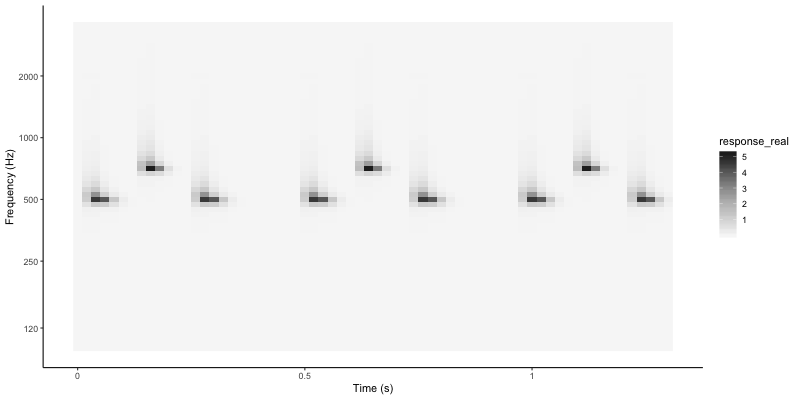

RObject{VecSxp}


In [127]:
pl = rplot(run1.spect.result[slice]) 
pl = R"""
pl = $pl + scale_fill_distiller(palette="Greys",direction=1) + 
    theme_classic() + scale_x_continuous(labels=c(0,0.5,1.0,1.5),breaks=$(ustrip(minimum(slice))) + c(0,0.5,1,1.5))
ggsave($(joinpath(plotdir,"fig2b.pdf")),width=3.5,height=1.5)
pl
"""

pl

In [133]:
if !isfile("output_slice.jld2")
    @save "output_slice.jld2" slice
else
    @load "output_slice.jld2" slice
end

┌ Warning: RCall.jl: Scale for 'fill' is already present. Adding another scale for 'fill', which
│ will replace the existing scale.
└ @ RCall /Users/davidlittle/.julia/packages/RCall/RPlFw/src/io.jl:110


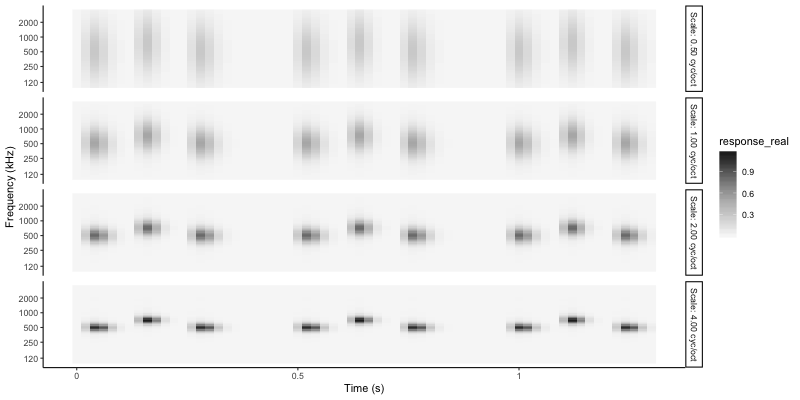

RObject{VecSxp}


In [128]:
cort = run1.cortical.result[slice]
absc = similar(cort,AxisArrays.axes(cort)...)
absc .= abs.(cort)
pl = rplot(absc)
pl = R"""
pl = $pl + scale_fill_distiller(palette="Greys",direction=1) + 
    theme_classic() + scale_x_continuous(labels=c(0,0.5,1.0,1.5),breaks=$(ustrip(minimum(slice))) + c(0,0.5,1,1.5))
ggsave($(joinpath(plotdir,"fig2c.pdf")),width=3.5,height=3)
pl
"""
pl

In [130]:
pldf,ax = asplotable(run1.sources.outweights[slice])
pldf.params = string.(pldf.params)
pldf.time .-= ustrip(minimum(slice))
pl = plot(pldf,x=:time,y=:value,xgroup=:params,color=:params,Geom.line,Coord.cartesian(xmax=1.36,ymin=-0.02))
draw(PDF(joinpath(plotdir,"fig2e_1.pdf"),4.5inch,2inch),pl)
draw(SVG(5inch,2inch),pl)

┌ Warning: The following aesthetics are mapped, but not used by any geometry:
│ xgroup
└ @ Gadfly /Users/davidlittle/.julia/packages/Gadfly/ew1SM/src/Gadfly.jl:484
┌ Warning: The following aesthetics are mapped, but not used by any geometry:
│ xgroup
└ @ Gadfly /Users/davidlittle/.julia/packages/Gadfly/ew1SM/src/Gadfly.jl:484
┌ Warning: For svg transparent colors, use either e.g. fill(RGBA(r,g,b,a)) or fillopacity(a), but not both.
└ @ Compose /Users/davidlittle/.julia/packages/Compose/wlPCt/src/svg.jl:1271


┌ Warning: RCall.jl: Scale for 'fill' is already present. Adding another scale for 'fill', which
│ will replace the existing scale.
└ @ RCall /Users/davidlittle/.julia/packages/RCall/RPlFw/src/io.jl:110


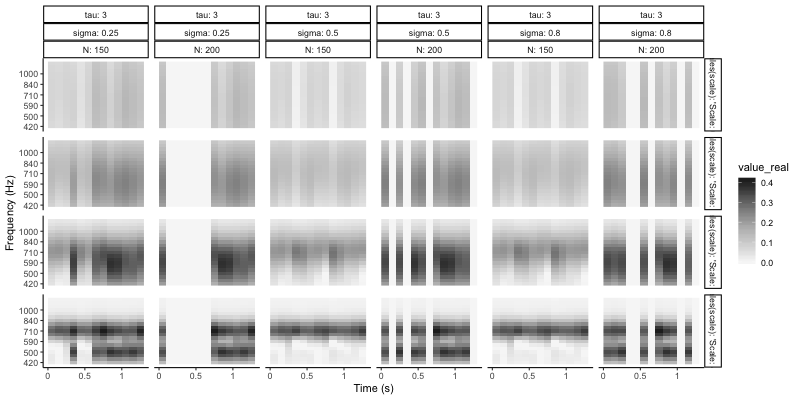

RObject{VecSxp}


In [131]:
pl = rplot(map(x -> x[:,:,:,slice],run1.sources.tracks) )
pl = R"""
pl = $pl + scale_fill_distiller(palette="Greys",direction=1) + 
    theme_classic() + scale_x_continuous(labels=c(0,0.5,1.0,1.5),breaks=$(ustrip(minimum(slice))) + c(0,0.5,1,1.5))
ggsave($(joinpath(plotdir,"fig2e_2.pdf")),width=5,height=3)
pl
"""
pl

┌ Warning: RCall.jl: Scale for 'fill' is already present. Adding another scale for 'fill', which
│ will replace the existing scale.
└ @ RCall /Users/davidlittle/.julia/packages/RCall/RPlFw/src/io.jl:110


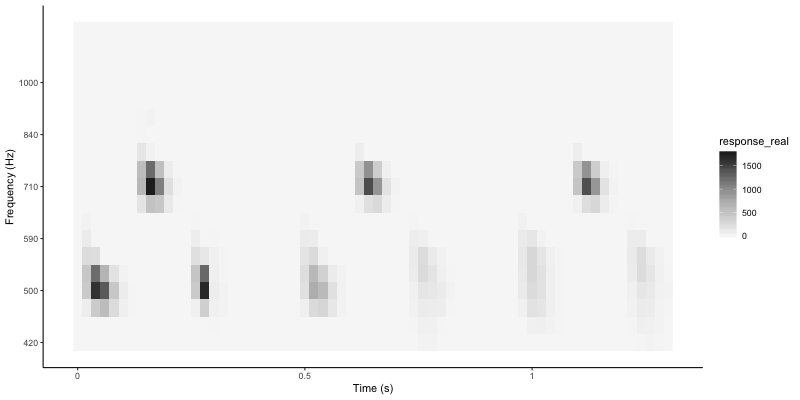

RObject{VecSxp}


In [132]:
pl = rplot(run1.primary_source[slice])
pl = R"""
pl = $pl + scale_fill_distiller(palette="Greys",direction=1) + 
    theme_classic() + scale_x_continuous(labels=c(0,0.5,1.0,1.5),breaks=$(ustrip(minimum(slice))) + c(0,0.5,1,1.5))
ggsave($(joinpath(plotdir,"fig2f.pdf")),width=3.5,height=1.5)
pl
"""
pl